In [51]:
# Exercise 7.1
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS

coord = SkyCoord.from_name("J140404.9+005953.3")
xid = SDSS.query_region(coord, radius="1 arcsec", spectro=True)
spectra = SDSS.get_spectra(matches=xid)[0]
spec = spectra[1].data
spec.shape

(3825,)

Text(0, 0.5, 'Flux')

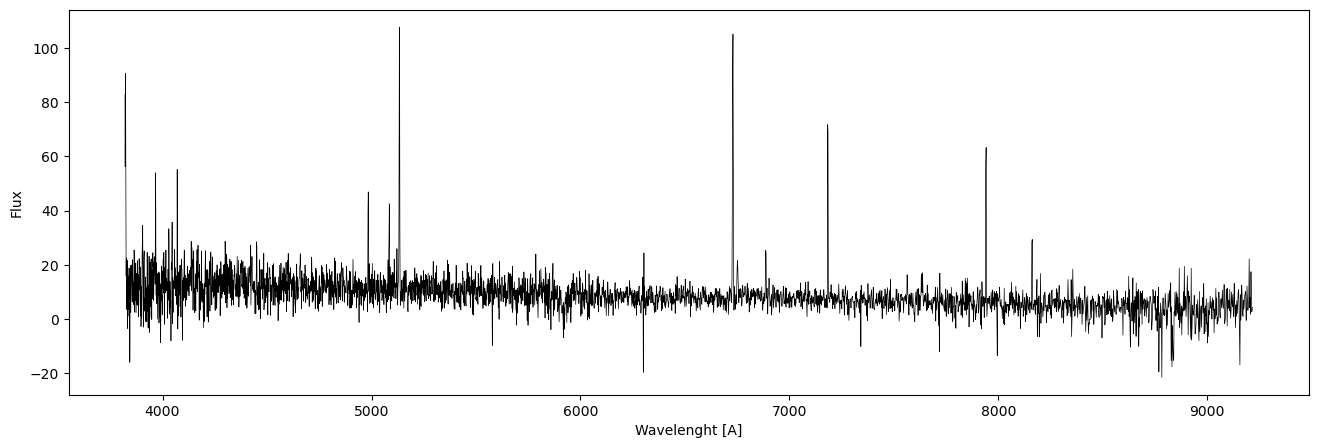

In [52]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(16, 5))
ax.plot(10 ** spec["loglam"], spec["flux"], lw=0.5, color="k")
ax.set_xlabel("Wavelenght [A]")
ax.set_ylabel("Flux")

Text(0, 0.5, 'Flux')

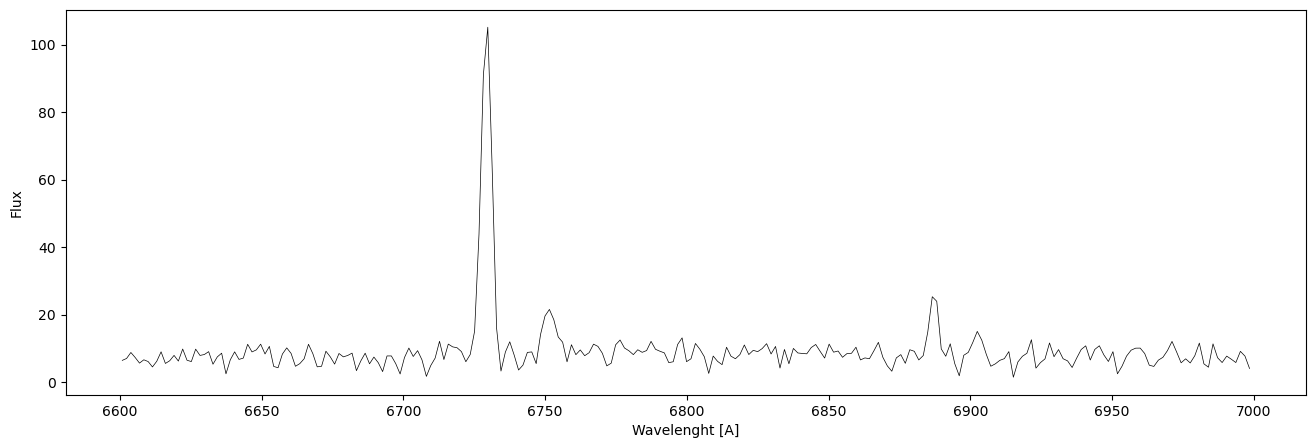

In [53]:
import numpy as np

(ind,) = np.where((10 ** spec["loglam"] > 6600) & (10 ** spec["loglam"] < 7000))
wl_use = 10 ** spec["loglam"][ind]
fl_use = spec["flux"][ind]
fix, ax = plt.subplots(figsize=(16, 5))
ax.plot(wl_use, fl_use, lw=0.5, color="k")
ax.set_xlabel("Wavelenght [A]")
ax.set_ylabel("Flux")

(6700.0, 6760.0)

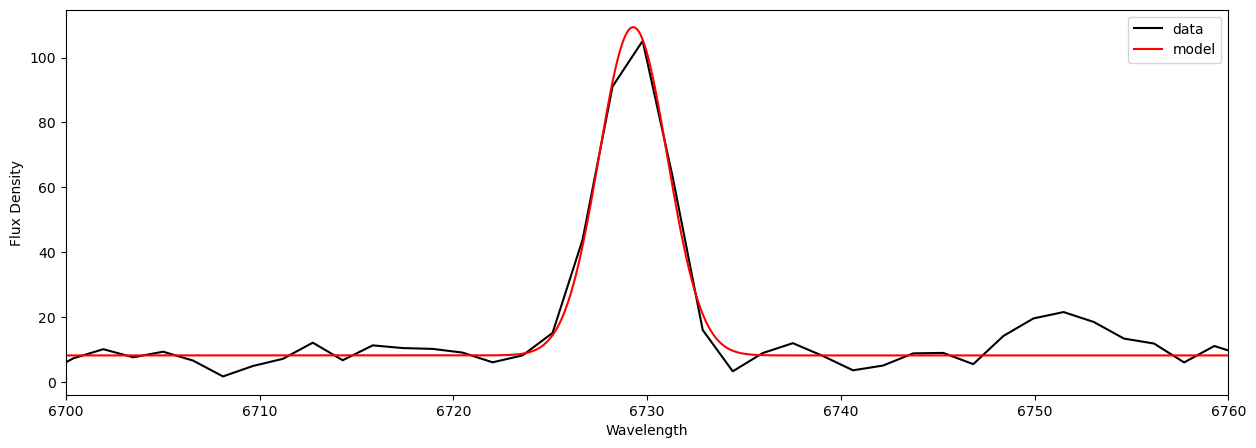

In [54]:
from scipy.optimize import curve_fit


def gauss(x, amp, loc, sigma, baseline):
    return amp * np.exp(-np.power(x - loc, 2.0) / (2 * np.power(sigma, 2.0))) + baseline


fit = curve_fit(f=gauss, xdata=wl_use, ydata=fl_use, p0=[100, 6730, 0.25, 10])
xx = np.linspace(6700, 6760, 1000)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl_use, fl_use, label="data", color="k")

params = fit[0]
ax.plot(xx, gauss(xx, *params), label="model", color="r")
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux Density")
ax.legend()
ax.set_xlim(6700, 6760)

In [55]:
amp, loc, sigma, baseline = params

print(f"Amplitude: {amp}")
print(f"Expected value: {loc}")
print(f"Sigma: {sigma}")
print(f"Baseline: {baseline}")

Amplitude: 101.21556123832073
Expected value: 6729.277881294695
Sigma: 1.7625206092895496
Baseline: 8.15964498270004


In [56]:
def z_from_lam(lam_emit, lam_measured):
    lam_shift = lam_measured / lam_emit
    return lam_shift - 1


z_from_lam(6564, loc)

np.float64(0.025179445657327104)